In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
# Based on the previous output, the correct file name is 'survey lung cancer.csv'
file_path = "survey lung cancer.csv"

# Load the latest version using dataset_load as recommended
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "mysarahmadbhat/lung-cancer",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("records:", df.to_string())


100%|██████████| 11.0k/11.0k [00:00<00:00, 20.1MB/s]

records:     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER
0        M   69        1               2        2              1                1         2         1         2                  2         2                    2                      2           2         YES
1        M   74        2               1        1              1                2         2         2         1                  1         1                    2                      2           2         YES
2        F   59        1               1        1              2                1         2         1         2                  1         2                    2                      1           2          NO
3        M   63        2               2        2              1                1         1         1         1                  2         1               

In [2]:
import os

# List files in the dataset directory
dataset_directory = '/kaggle/input/lung-cancer'
if os.path.exists(dataset_directory):
    print("Files in the dataset directory:", os.listdir(dataset_directory))
else:
    print(f"Directory not found: {dataset_directory}")

Directory not found: /kaggle/input/lung-cancer


In [3]:
# Define the list of condition columns
condition_cols = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']

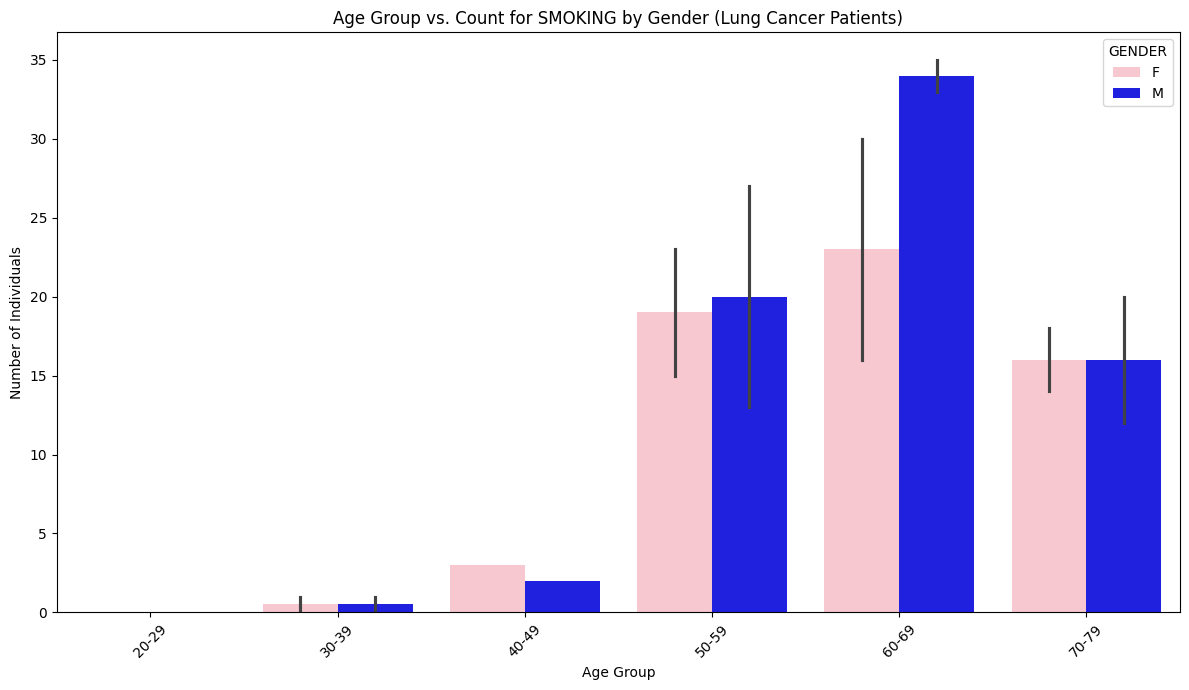

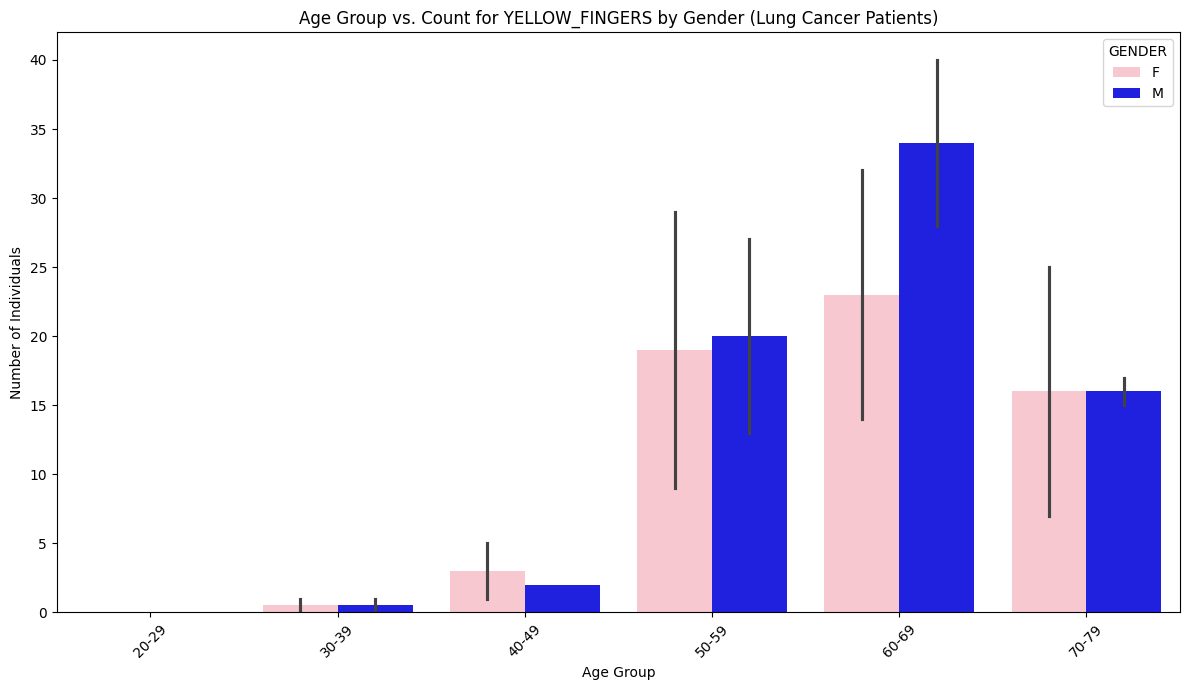

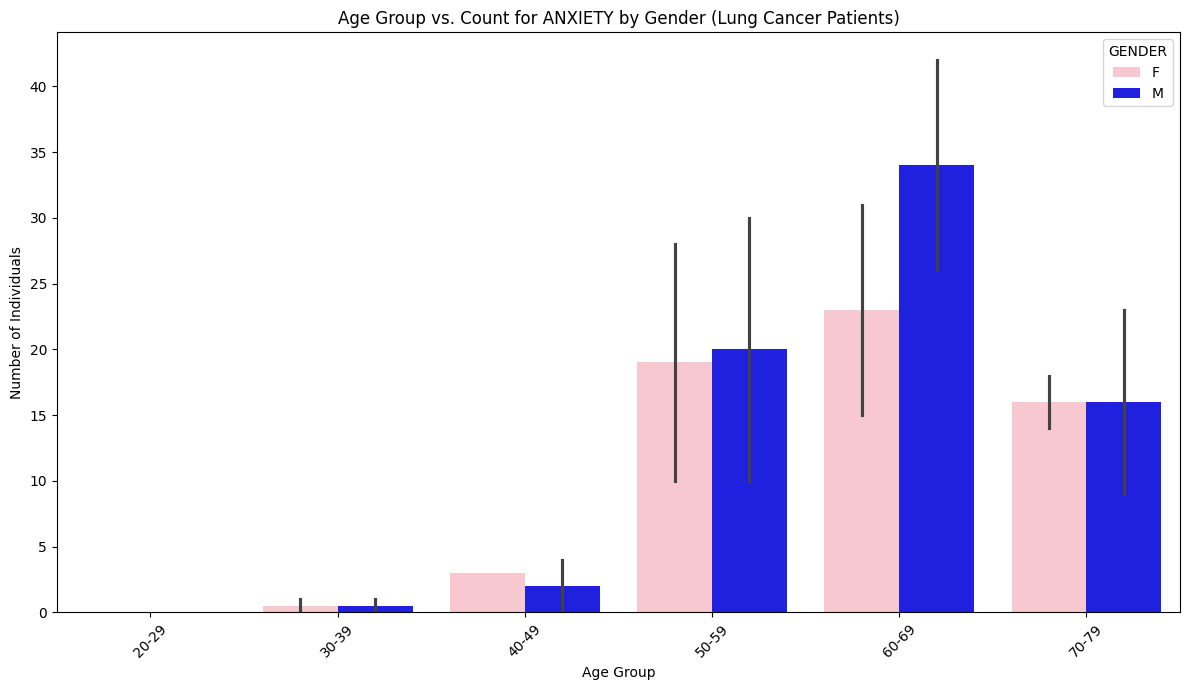

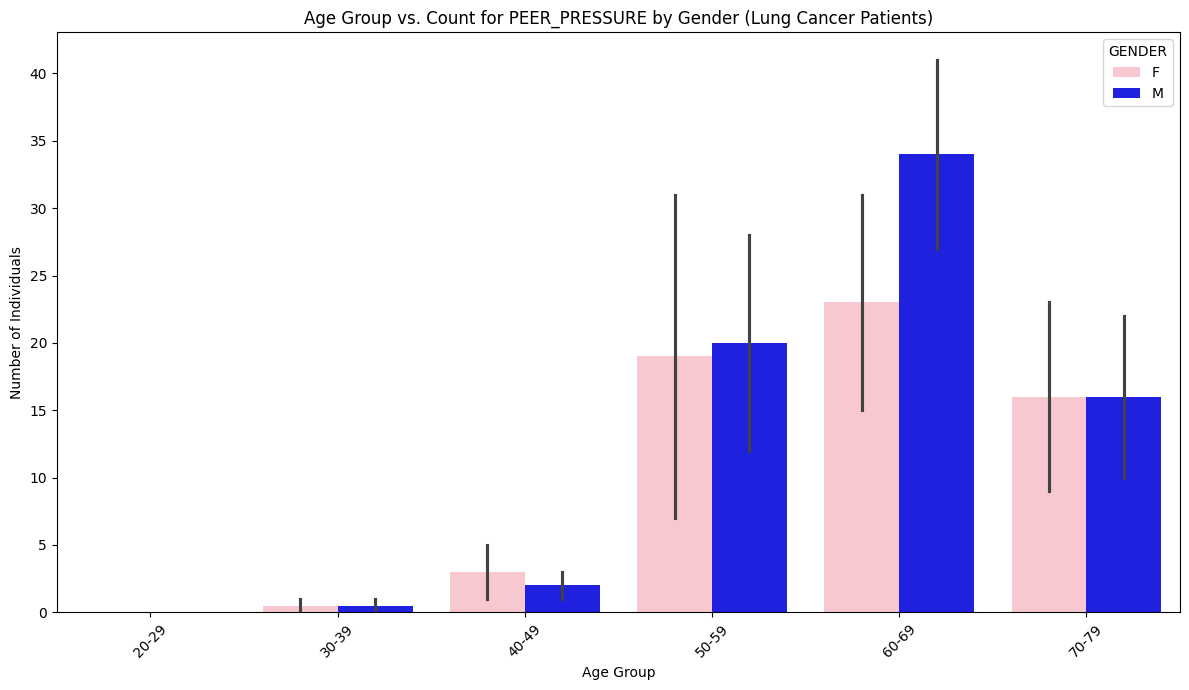

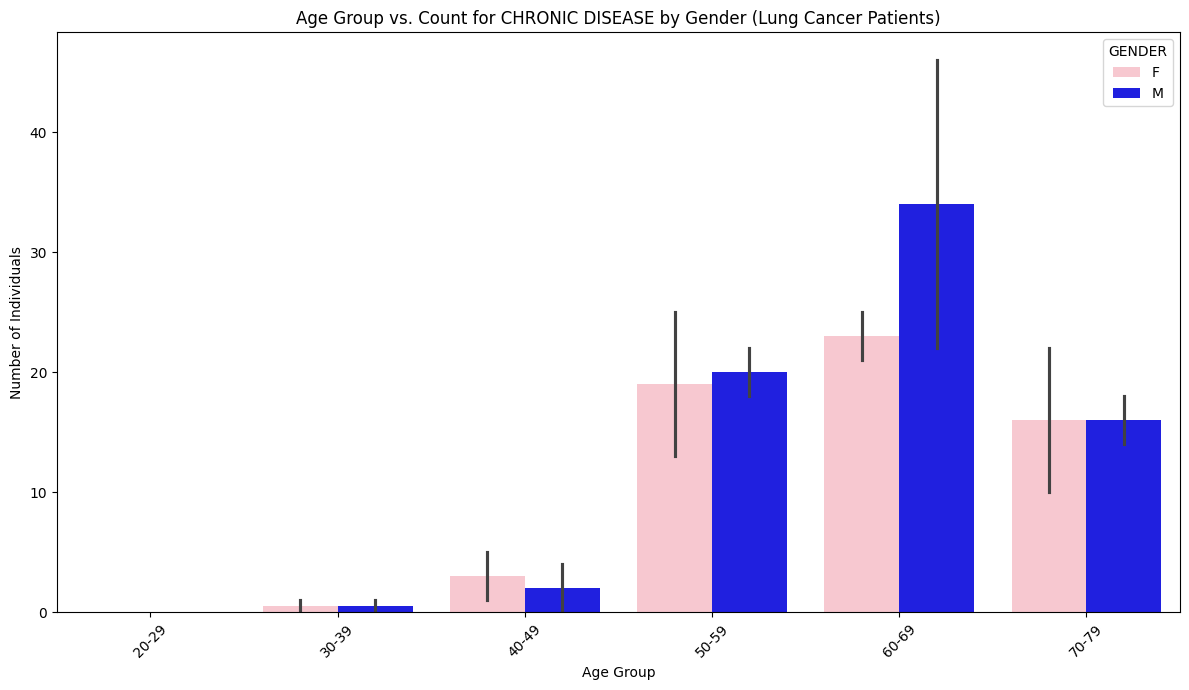

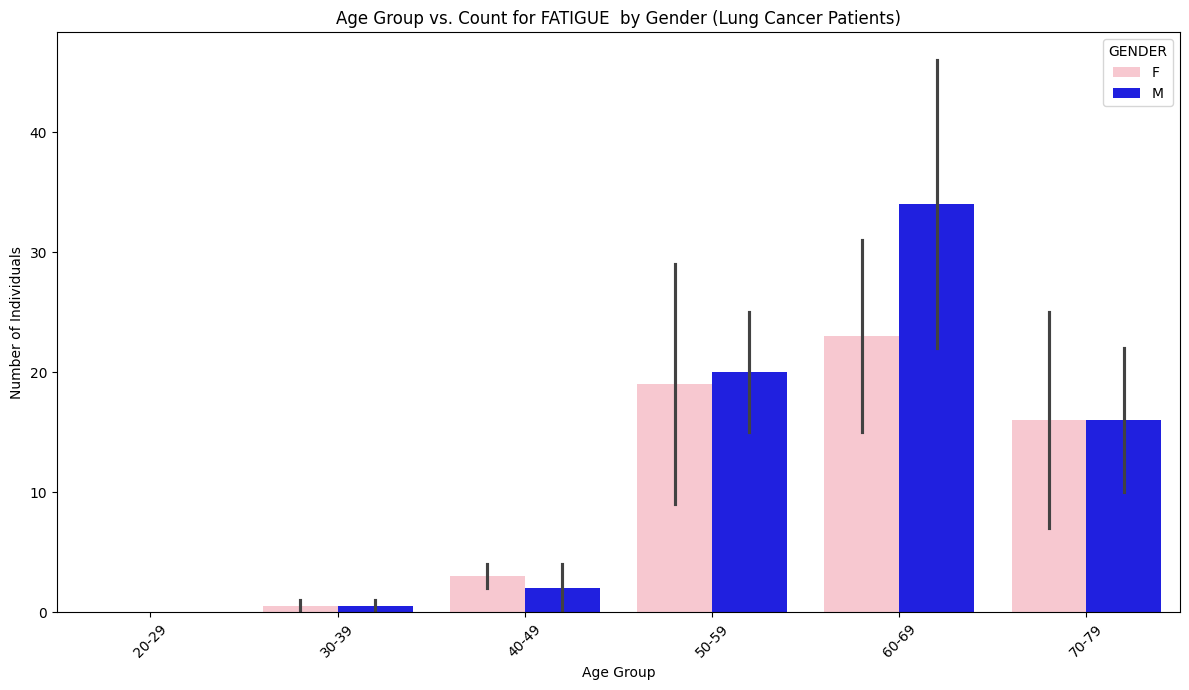

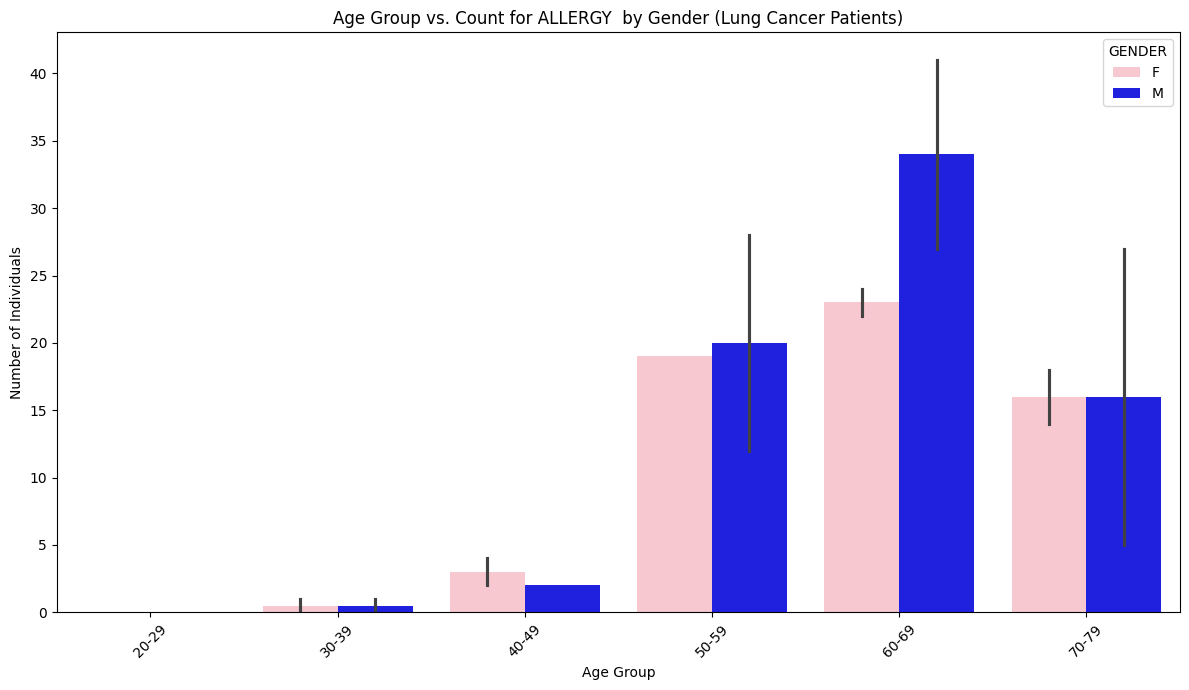

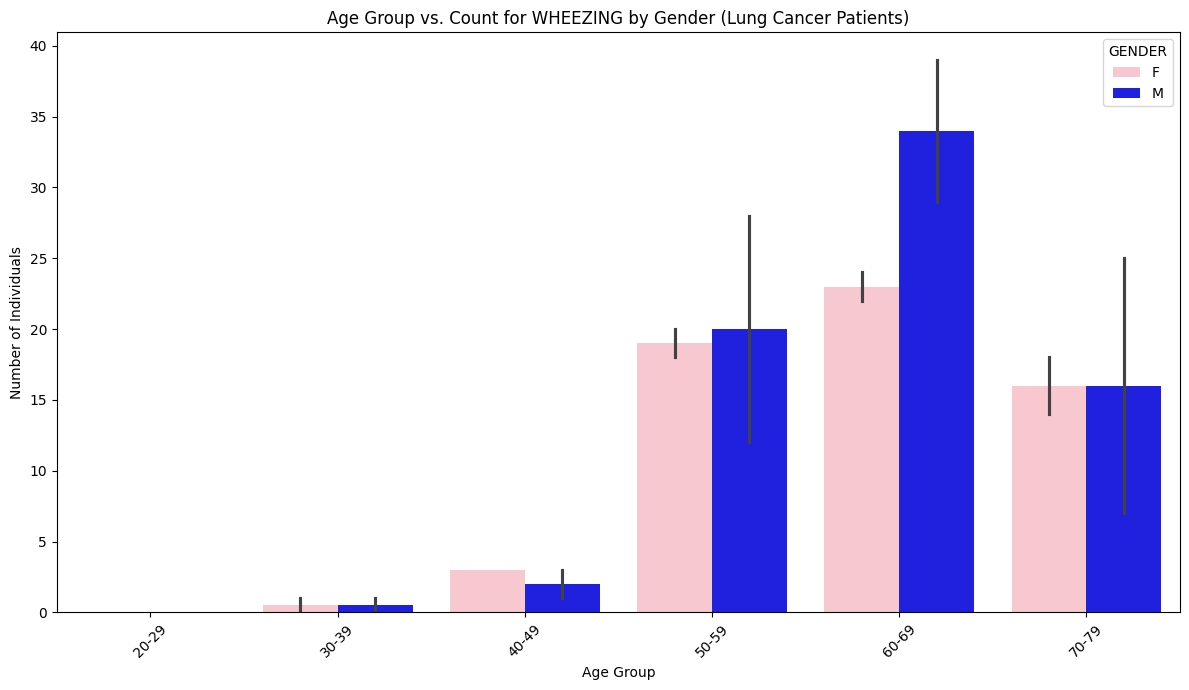

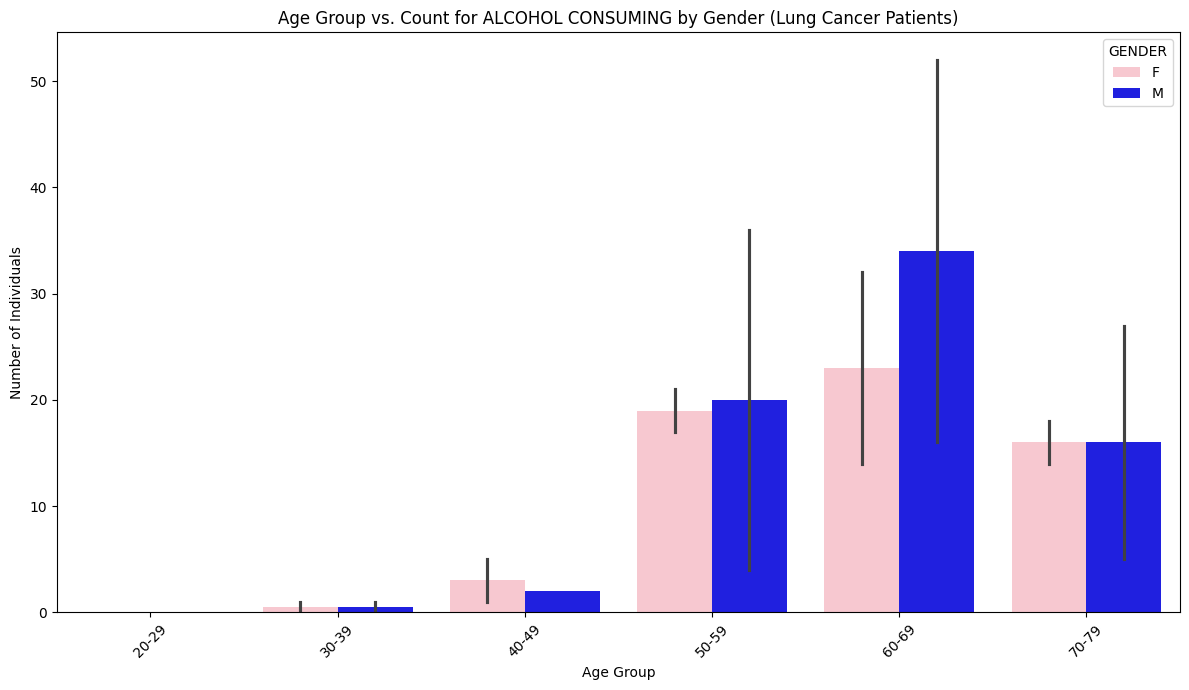

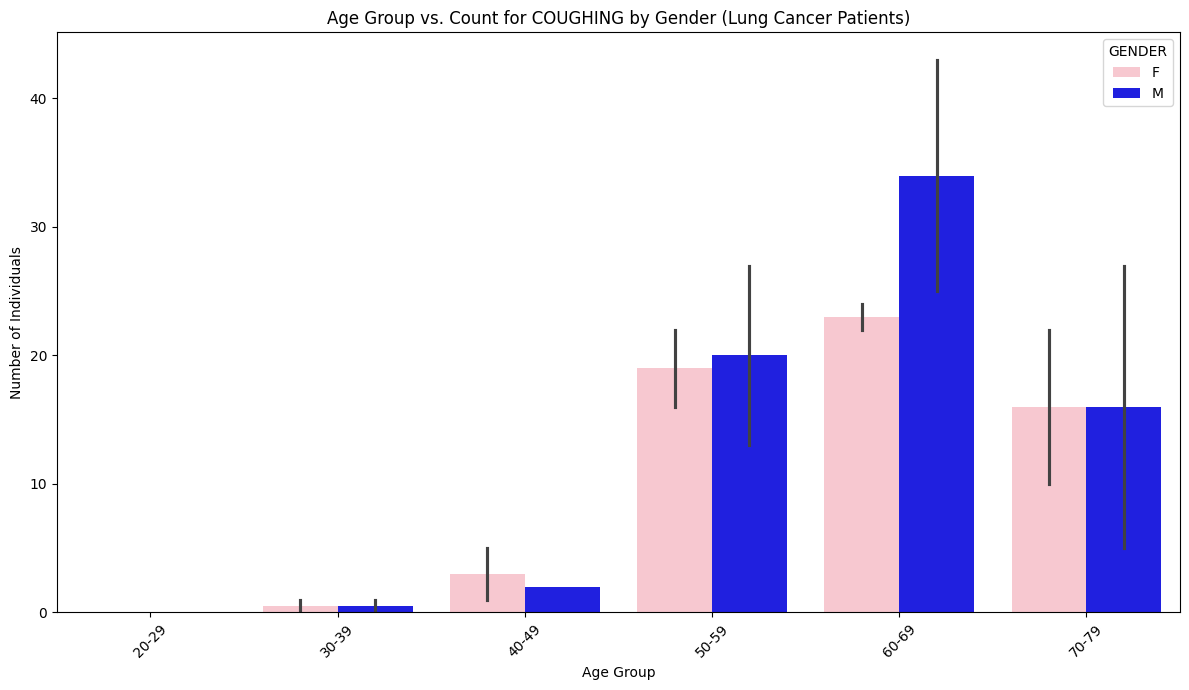

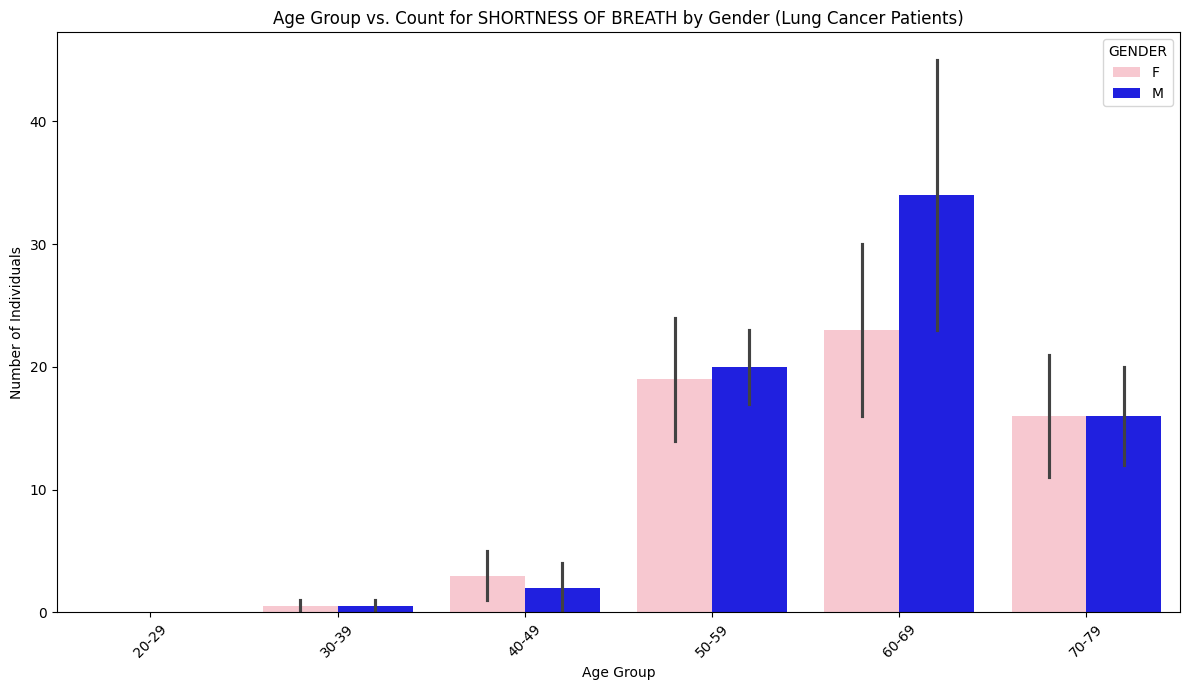

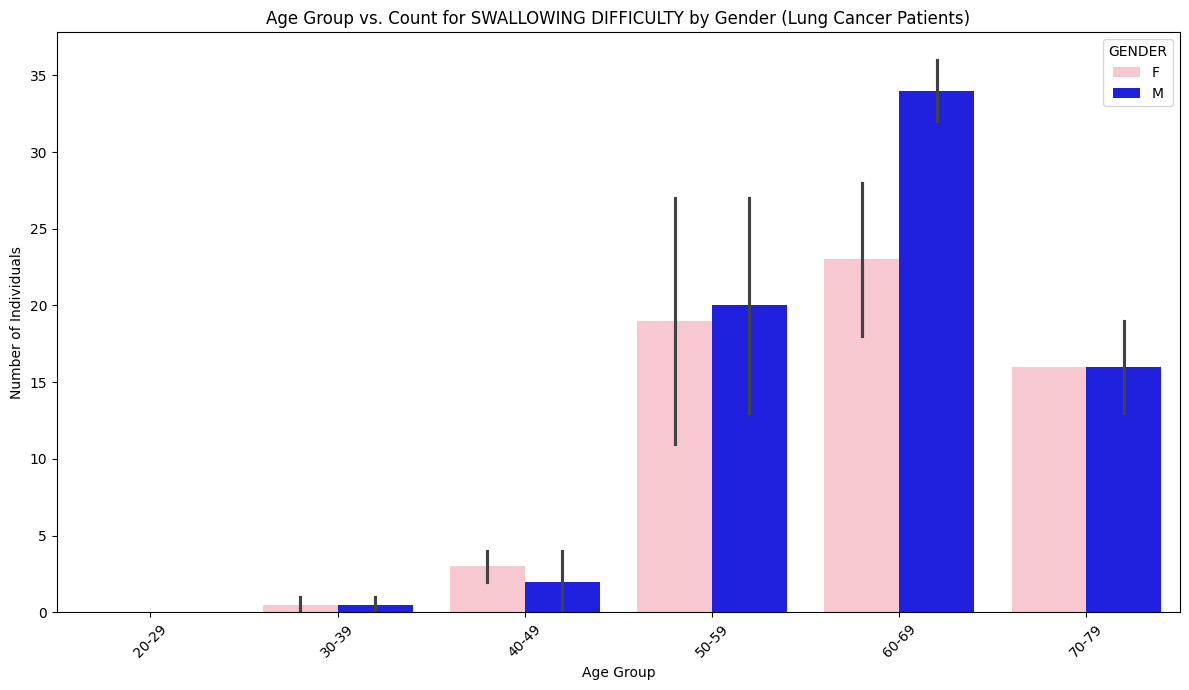

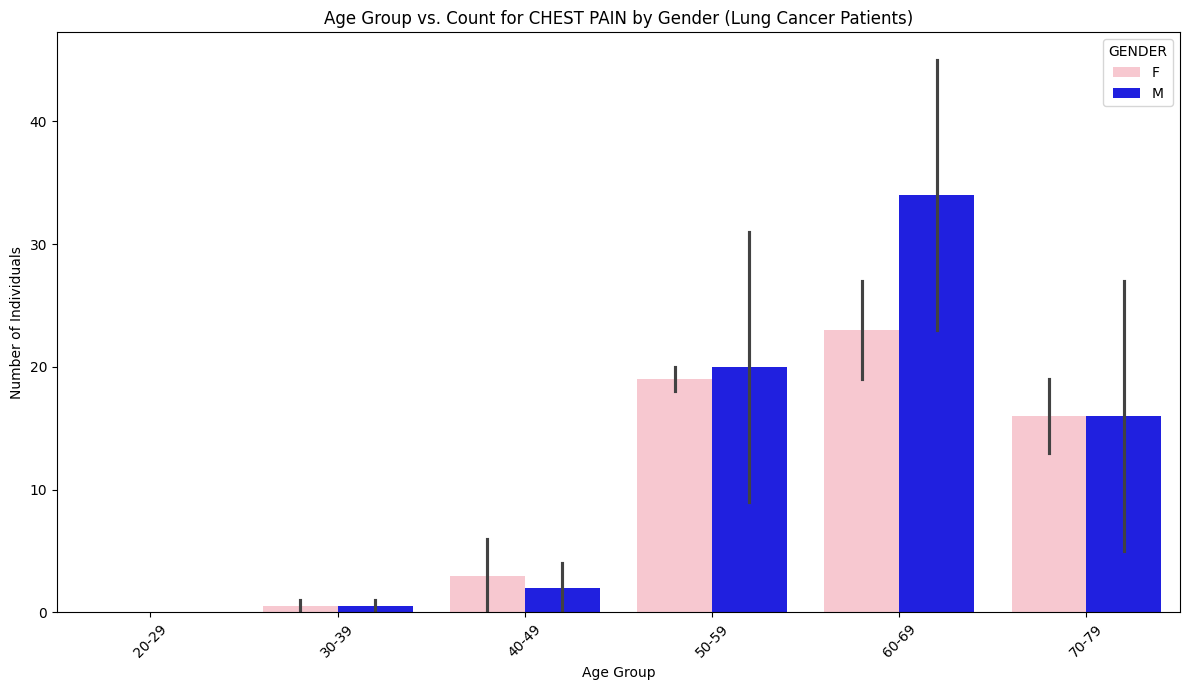

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create age groups
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['Age_Group'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

# Filter data for lung cancer patients
df_lung_cancer_filtered = df[df['LUNG_CANCER'] == 'YES'].copy()

for condition in condition_cols:
    grouped_data = df_lung_cancer_filtered.groupby(['Age_Group', 'GENDER', condition], observed=False).size().reset_index(name='Count')
    plt.figure(figsize=(12, 7))
    sns.barplot(data=grouped_data, x='Age_Group', y='Count', hue='GENDER', palette={'M': 'blue', 'F': 'pink'})
    plt.title(f'Age Group vs. Count for {condition} by Gender (Lung Cancer Patients)')
    plt.xlabel('Age Group')
    plt.ylabel('Number of Individuals')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()